Please upload your dataset file (OFFLINE.xlsx):


Saving OFFLINE.xlsx to OFFLINE.xlsx
Model Accuracy: 0.50
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           3       0.33      0.50      0.40         2
           4       0.00      0.00      0.00         3
           5       0.50      1.00      0.67         1

    accuracy                           0.50         8
   macro avg       0.57      0.70      0.61         8
weighted avg       0.40      0.50      0.43         8



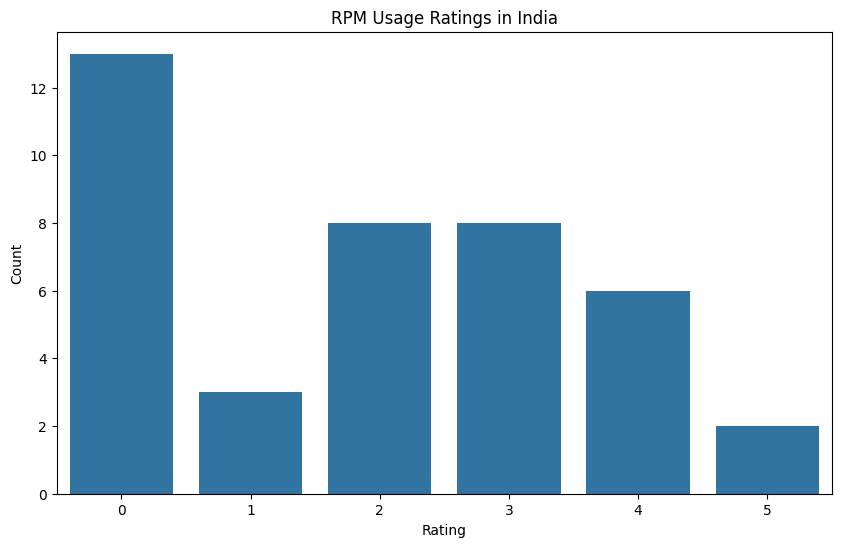

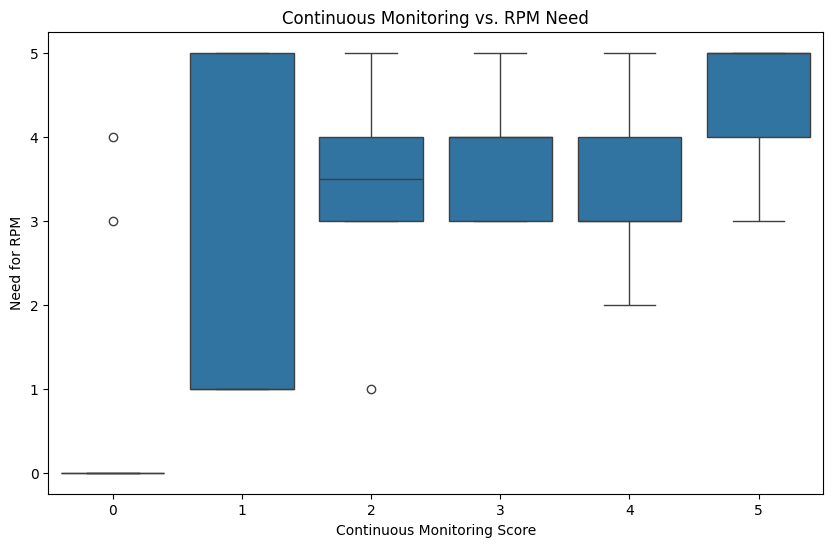

<ipython-input-2-a127eae81a6e>:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="FELXIBLE MONITORING", y="AFFECT TREATMENT SCENARIOS", data=df, ci=None)


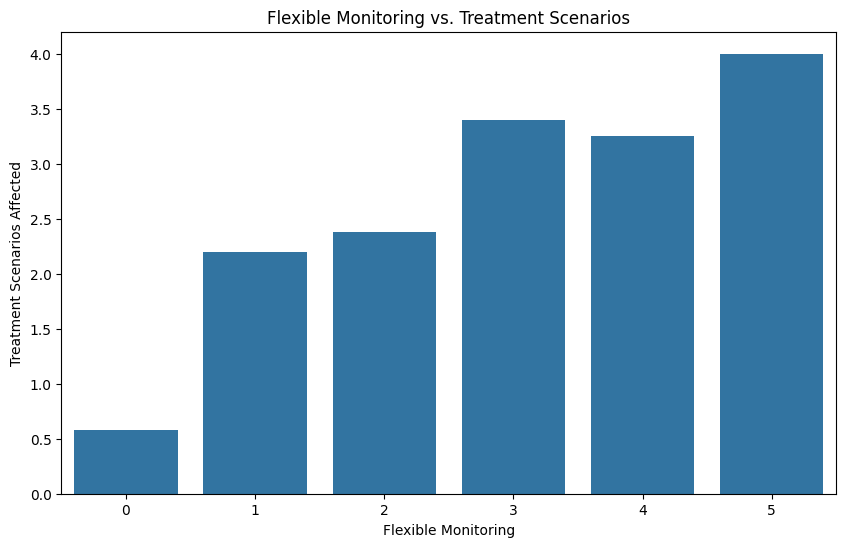

In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from google.colab import files

# Upload the dataset
print("Please upload your dataset file (OFFLINE.xlsx):")
uploaded = files.upload()
data_path = list(uploaded.keys())[0]  # Get the uploaded file name

# Load the dataset
df = pd.read_excel(data_path, sheet_name="Sheet3")

# Data Cleaning and Preprocessing
# Fill missing values with 0 or appropriate defaults
df.fillna(0, inplace=True)

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Select target variable and features
target = "NEED OF RPM"  # Predicting need for RPM
features = [col for col in df_encoded.columns if col != target]

X = df_encoded[features]
y = df_encoded[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a predictive model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualization: RPM Usage Ratings
plt.figure(figsize=(10, 6))
sns.countplot(x="USAGE OF RPM IN INDIA- RATING", data=df)
plt.title("RPM Usage Ratings in India")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Visualization: Impact on Continuous Monitoring
plt.figure(figsize=(10, 6))
sns.boxplot(x="CONTINOUS MONITORING SCORE", y="NEED OF RPM", data=df)
plt.title("Continuous Monitoring vs. RPM Need")
plt.xlabel("Continuous Monitoring Score")
plt.ylabel("Need for RPM")
plt.show()

# Visualization: Flexible Monitoring and Treatment Impact
plt.figure(figsize=(10, 6))
sns.barplot(x="FELXIBLE MONITORING", y="AFFECT TREATMENT SCENARIOS", data=df, ci=None)
plt.title("Flexible Monitoring vs. Treatment Scenarios")
plt.xlabel("Flexible Monitoring")
plt.ylabel("Treatment Scenarios Affected")
plt.show()

# Save the processed data and model (optional)
processed_data_path = "processed_data.csv"
model_path = "rpm_model.pkl"
df_encoded.to_csv(processed_data_path, index=False)

# In Colab, you can download these files using:
# from google.colab import files
# files.download(processed_data_path)
# pickle.dump(model, open(model_path, 'wb'))
# files.download(model_path)
